# Text Preprocessing

## 0. Create Data Sets

In [1]:
import pandas as pd

# create a list of sentences
data = [
    "When life gives you lemons, make lemonade! 🙂",
    "She bought 2 lemons for $1 at Maven Market.",
    "A dozen lemons will make a gallon of lemonade. [AllRecipes]",
    "lemon, lemon, lemons, lemon, lemon, lemons",
    "He's running to the market to get a lemon — there's a great sale today.",
    "Does Maven Market carry Eureka lemons or Meyer lemons?",
    "An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",
    "iced tea is my favorite"
]

# expand the column width to see the full sentences
pd.set_option('display.max_colwidth', None)

# turn it into a dataframe
data_df = pd.DataFrame(data, columns=["sentence"])
data_df

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [2]:
# create a test series of sentences for later on
test = [
    "We're going to start this course with traditional NLP applications.",
    "Then we'll move on to modern NLP theory.",
    "Finally, we'll wrap things up with modern NLP applications."
]

test_series = pd.Series(test)
test_series

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

## 1. Text Preprocessing with Pandas

In [3]:
# make a copy of the data in case we mess up later on
df = data_df.copy()
df

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [4]:
# lowercase text
df['sentence_clean'] = df['sentence'].str.lower()
df

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂","when life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for $1 at maven market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade. [allrecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons","lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.,he's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]","an arnold palmer is half lemonade, half iced tea. [wikipedia]"
7,iced tea is my favorite,iced tea is my favorite


In [5]:
# remove text between brackets, including the brackets
# ChatGPT: use str.replace with regex=true on a series to replace all text within brackets including the brackets, with an empty string
df['sentence_clean'] = df['sentence_clean'].str.replace(r'\[.*?\]', '', regex=True)
df

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂","when life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for $1 at maven market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade.
3,"lemon, lemon, lemons, lemon, lemon, lemons","lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.,he's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]","an arnold palmer is half lemonade, half iced tea."
7,iced tea is my favorite,iced tea is my favorite


In [6]:
# remove punctuation
# ChatGPT: use str.replace with regex=true on a series to replace all punctuation with an empty string
df['sentence_clean'] = df['sentence_clean'].str.replace(r'[^\w\s]', '', regex=True)
df

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",an arnold palmer is half lemonade half iced tea
7,iced tea is my favorite,iced tea is my favorite


### PRO TIP: Create a lower_replace function

In [7]:
# put all text preprocessing steps into a function to better organize our code
def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'\[.*?\]', '', regex=True) # remove words in brackets
    output = output.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
    return output

In [8]:
# try it out on our test series
lower_replace(test_series)

0    were going to start this course with traditional nlp applications
1                               then well move on to modern nlp theory
2             finally well wrap things up with modern nlp applications
dtype: object

In [9]:
# use the lower_remove function - the output has lowercased letters, no words in brackets and no punctuation
lower_replace(df.sentence)

0                              when life gives you lemons make lemonade 
1                              she bought 2 lemons for 1 at maven market
2                         a dozen lemons will make a gallon of lemonade 
3                                  lemon lemon lemons lemon lemon lemons
4    hes running to the market to get a lemon  theres a great sale today
5                  does maven market carry eureka lemons or meyer lemons
6                       an arnold palmer is half lemonade half iced tea 
7                                                iced tea is my favorite
Name: sentence, dtype: object

## 2. Text Preprocessing with spaCy

In [10]:
# view our dataframe once again
df

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",an arnold palmer is half lemonade half iced tea
7,iced tea is my favorite,iced tea is my favorite


In [11]:
# load the spacy english model
# run this code in the command line if you get an error: python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
# look at just one phrase
phrase = df.sentence_clean[0]
phrase

'when life gives you lemons make lemonade '

In [13]:
# turn the phrase into a spacy document
doc = nlp(phrase)
doc

when life gives you lemons make lemonade 

In [14]:
# break up the text into tokens
[token.text for token in doc]

['when', 'life', 'gives', 'you', 'lemons', 'make', 'lemonade']

In [15]:
# in addition, lemmatize the tokens to their root form
[token.lemma_ for token in doc]

['when', 'life', 'give', 'you', 'lemon', 'make', 'lemonade']

In [16]:
# in addition, remove the stop words
norm = [token.lemma_ for token in doc if not token.is_stop]
norm

['life', 'give', 'lemon', 'lemonade']

In [17]:
# side note: view the spacy stop word list
list(nlp.Defaults.stop_words)[:10]

['whereupon',
 'everything',
 'bottom',
 'hereupon',
 'somewhere',
 '‘ve',
 'them',
 'an',
 'unless',
 'whoever']

In [18]:
# convert the list into a string for easier analysis later on
' '.join(norm)

'life give lemon lemonade'

### PRO TIP: Create a token_lemma_nonstop function

In [19]:
# put all text preprocessing steps into a function to better organize our code
def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop] # tokenize, lemmatize and remove stop words
    output = ' '.join(output) # convert list into string
    return output

In [20]:
# try it out on our test series, this time using .apply
test_series.apply(token_lemma_nonstop)

0    go start course traditional NLP application .
1                              modern NLP theory .
2    finally , wrap thing modern NLP application .
dtype: object

In [21]:
# apply the function on a column of text - the output is tokenized, lemmatized and has no stop words
lower_replace(df.sentence).apply(token_lemma_nonstop)

0                       life give lemon lemonade
1                     buy 2 lemon 1 maven market
2                    dozen lemon gallon lemonade
3            lemon lemon lemon lemon lemon lemon
4        s run market lemon   s great sale today
5    maven market carry eureka lemon meyer lemon
6       arnold palmer half lemonade half ice tea
7                               ice tea favorite
Name: sentence, dtype: object

### OPTIONAL: Parts of speech tagging

In [22]:
# look at just one phrase
phrase2 = lower_replace(df.sentence).apply(token_lemma_nonstop)[0]
phrase2

'life give lemon lemonade'

In [23]:
# turn the phrase into a spacy document
doc2 = nlp(phrase2)
doc2

life give lemon lemonade

In [24]:
# view the parts of speech tags
pos = [(token.text, token.pos_) for token in doc2]
pos

[('life', 'NOUN'), ('give', 'VERB'), ('lemon', 'NOUN'), ('lemonade', 'PROPN')]

In [25]:
# filter on just the nouns and proper nouns
nouns = [(token.text) for token in doc2 if token.pos_ in ['NOUN', 'PROPN']]
nouns

['life', 'lemon', 'lemonade']

In [26]:
# convert the list into a string for easier analysis later on
' '.join(nouns)

'life lemon lemonade'

### PRO TIP: Create a filter_pos function

In [27]:
# filter by parts of speech
def filter_pos(text, pos_list=['NOUN', 'PROPN']):
    doc = nlp(text)
    output = [(token.text) for token in doc if token.pos_ in pos_list] # return on the nouns and pronouns
    output = ' '.join(output) # convert list into string
    return output

In [28]:
# try it out on our test data
test_series.apply(filter_pos)

0    course NLP applications
1                 NLP theory
2    things NLP applications
dtype: object

In [29]:
# apply the function on a column of text - the output only includes nouns and proper nouns
lower_replace(df.sentence).apply(token_lemma_nonstop).apply(filter_pos)

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [30]:
# notice that by switching the order of the normalization steps, we get different results
lower_replace(df.sentence).apply(filter_pos).apply(token_lemma_nonstop)

0              life lemon lemonade
1               lemon maven market
2      dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon
4          market lemon sale today
5        market eureka lemon lemon
6              palmer lemonade tea
7                              tea
Name: sentence, dtype: object

## 3. Create an NLP Pipeline

In [31]:
# copy down the helper functions
def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'\[.*?\]', '', regex=True)
    output = output.str.replace(r'[^\w\s]', '', regex=True)
    return output

def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    output = ' '.join(output)
    return output 

def filter_pos(text, pos_list=['NOUN', 'PROPN']):
    doc = nlp(text)
    output = [(token.text) for token in doc if token.pos_ in pos_list]
    output = ' '.join(output)
    return output

In [32]:
# create an nlp pipeline
def nlp_pipeline(series):
    output = lower_replace(series)
    output = output.apply(token_lemma_nonstop)
    output = output.apply(filter_pos)
    return output

In [33]:
# view the original test sentences
test_series

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

In [34]:
# view the cleaned, normalized and filtered test sentences
nlp_pipeline(test_series)

0          nlp application
1               nlp theory
2    thing nlp application
dtype: object

In [35]:
# view the original sentences
df.sentence

0                               When life gives you lemons, make lemonade! 🙂
1                                She bought 2 lemons for $1 at Maven Market.
2                A dozen lemons will make a gallon of lemonade. [AllRecipes]
3                                 lemon, lemon, lemons, lemon, lemon, lemons
4    He's running to the market to get a lemon — there's a great sale today.
5                     Does Maven Market carry Eureka lemons or Meyer lemons?
6              An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]
7                                                    iced tea is my favorite
Name: sentence, dtype: object

In [36]:
# view the cleaned and normalized sentences
text_clean = nlp_pipeline(df.sentence)
text_clean

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

### PRO TIP: Save your cleaned data as a pickle file

In [37]:
# save the output as a pickle file to load into a notebook later on
pd.to_pickle(text_clean, 'text_clean.pkl')

## 4. Count Vectorizer

In [38]:
# if you don't want to run all your cleaning code again, just load in the pickle file
series = pd.read_pickle('text_clean.pkl')
series

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [39]:
# basic count vectorizer code
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
dtm = cv.fit_transform(series)
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,0,1,0,0,0,0,2,0,0,1,1,0,0,0,0
6,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [40]:
# count vectorizer code with parameter tweaks
cv2 = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=.8)
dtm2 = cv2.fit_transform(series)
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv2.get_feature_names_out())
dtm_df2

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


### PRO TIP: Quick EDA with Count Vectorizer

In [41]:
# return the most common terms
term_freq = dtm_df2.sum()
term_freq

ice              2
ice tea          2
lemon           12
lemon lemon      6
lemonade         3
market           3
maven            2
maven market     2
tea              2
dtype: int64

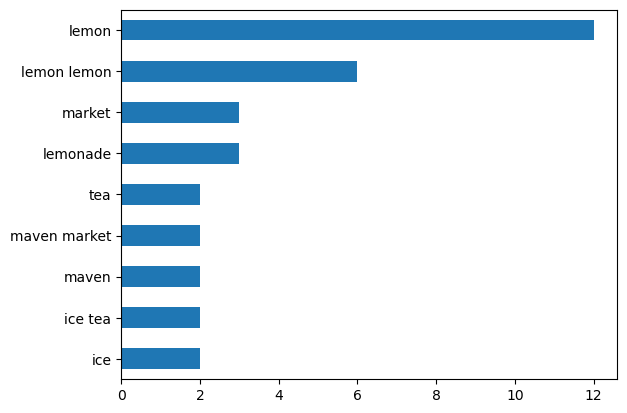

In [42]:
# visualize the most common words
term_freq.sort_values().plot(kind='barh');

## 5. TF-IDF Vectorizer

In [43]:
# basic tfidf vectorizer code
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
tfidf = tv.fit_transform(series)
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tv.get_feature_names_out())
tfidf_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375318,0.543168,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411442,0.000000,0.00000,0.595449,0.690041,0.000000,0.000000,0.000000,0.000000
2,0.600547,0.000000,0.000000,0.600547,0.000000,0.000000,0.300100,0.434311,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300100,0.000000,0.00000,0.434311,0.000000,0.000000,0.600547,0.000000,0.600547
5,0.000000,0.556913,0.000000,0.000000,0.000000,0.000000,0.556591,0.000000,0.00000,0.402755,0.466736,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.504577,0.422875,0.000000,0.364907,0.00000,0.000000,0.000000,0.504577,0.000000,0.422875,0.000000
7,0.000000,0.000000,0.644859,0.000000,0.000000,0.540443,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.540443,0.000000


In [44]:
# tfidf vectorizer with some parameter tweaks
tv2 = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.2, max_df=.8)
tfidf2 = tv2.fit_transform(series)
tfidf_df2 = pd.DataFrame(tfidf2.toarray(), columns=tv2.get_feature_names_out())
tfidf_df2

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0.000000,0.000000,0.568471,0.000000,0.822704,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.338644,0.000000,0.000000,0.490093,0.567948,0.567948,0.000000
2,0.000000,0.000000,0.568471,0.000000,0.822704,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.581897,0.813262,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.568471,0.000000,0.000000,0.822704,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.524634,0.439939,0.000000,0.379631,0.439939,0.439939,0.000000
6,0.516768,0.516768,0.000000,0.000000,0.445928,0.000000,0.000000,0.000000,0.516768
7,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350
